
## Decision Tree
Decision Tree
해석이 굉장히 편안한 classification model
regression도 가능함
학습 데이터를 바탕으로 모델을 만들고 test data를 넣어서 쓸 수 있는데, Decision Tree 자체는 크게 예측력이 좋지 못함(Model Variance 매우 높음)

의사결정 트리 생성 : 파티셔닝
Recursive하게 파티셔닝을 하여 생성
이 파티셔닝 기준이 정규성 가정을 설정하고 RSS로 진행하는가(Loss function), 아니면 다른 분포를 가정하고 진행하는가를 따라서 모델의 Variation을 형성 가능하다.

CART : 분할방법. Greedy algorithm을 따라서, local optima를 우선 고려하는 방식. 단계적으로 분할 조건을 탐색해 나아간다. 어떤 방식을 쓰느냐에 다라서 그 성능과 분류 결과가 dramatic하게 달라질 수 있다.

트리 분할 측정 척도 : 지니 계수, 정보 이득(Gini impurity, Information Gain)

## Gini Impurtiy, Information(Entropy)
Tree의 Partitioning이 얼마나 잘 이뤄졌는가?
데이터가 클래스 별로 고르게 분포가 되어있는지, 아니면 특정 클래스에 편중되어 분포되어 있는지 나타냄
편중될 수록 값이 작고, 고를 수록 값이 크다(Impurity)

Gini = 1 - ∑ fk^2 (fk는 k번째 클래스에 해당하는 데이터의 비율)

클래스가 두 개 존재할 때, 모든 데이터가 한 클래스에만 속한다면 1-(1^2 + 0^2) = 0
반반씩 속한다면 지니계수는 1-(0.5^2 + 0.5^2) = 0.5

Gini(C) = ∑ (nc / np) * Ginic
C = leap node 집합
Gini c = 자식 노드 c에 있는 지니 계수
np = 부모 노드 p에 속하는 데이터 수
nc = 자식 노드 c에 속하는 데이터 수

(0.0, 1.0)

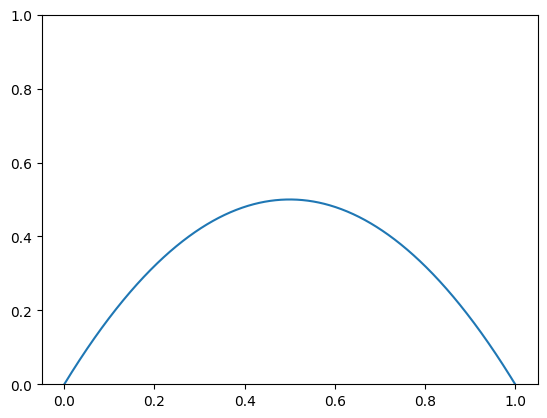

In [1]:
import matplotlib.pyplot as plt
import numpy as np
pos_fraction = np.linspace(0.00, 1.00, 1000)

gini = 1 - pos_fraction**2 - (1-pos_fraction)**2
plt.plot(pos_fraction, gini)
plt.ylim(0, 1)
ply.xlabel('Positive Fraction')
plt.ylabel('Gini Impurity')
plt.show() # 두개의 클래스일 경우를 보인 상황

In [4]:
def gini_impurity(labels): # function으로 구현
    if not labels:
        return 0
    counts = np.unique(labels, return_counts = True)[1] # np.unique의 [1] : unique한 요소의 개수
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)

print(gini_impurity([1, 2, 3, 1, 0, 0, 0, 3]))
print(gini_impurity([1, 1, 1, 1, 0, 0, 0, 0]))

0.71875
0.5


Entropy : 트리 분할 수 얼마나 순도가 더 좋아졌는가?
트리 분할을 통해 불확실성이 얼마나 줄어드는지 측정
전 후를 비교하는게 특징임
불확실성이 높다 = 클래스 별로 고르게 분포됨
모든 클래스에 똑같은 비율로 데이터가 존재할 때 여기서 어던 데이터를 임의로 뽑는다면 이 데이터가 어떤 클래스에 속할 지 불확실해진다. 반대로 특정 클래스에 편중되어있으면 그렇지 않다

Entropy = -∑ fk * log2 fk
(fk는 k번째 클래스에 해당하는 데이터의 비율)

Tree : 
Entropy(C) = -∑ (nc/np) Entropy(c) 
node별로 weight를 줘서 간단하게 계산.

In [11]:
def entropy(labels):
    if not labels : 
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

print(entropy([1, 0, 1, 1, 0, 1, 0, 0]))
print(entropy([0, 0, 0, 0, 0, 0, 0, 0]))
print(entropy([0, 0, 1, 0, 2, 2, 3, 4]))

1.0
-0.0
2.1556390622295662


## Ensemble methods
Ensemble Method :
Bagging, Boosting, Stacking, Blending, Voting, Averaging
여러 모델들을 독립적(이라고 가정하고)학습시키고, 각 모델이 만들어 낸 결과를 조합하여 최종 결과를 생성

Bagging : Bootstrap 으로 b개의 데이터셋을 만들어서 b개의 모델을 만든 뒤 그 결과를 평균내거나(회귀) 최다 득표 보팅(분류)하는 방식
실제로 독립된 샘플이 만들어 지지 못하기 때문에 분산이 드라마틱하게 줄어들지 못한다

Random Forest : Bootstrap 으로 b개의 데이터셋을 만들어서 B개의 모델을 만드는 것은 똑같은데, 모든 피쳐들을 똑같이 고려하는게 아닌 개별 모델이 각자 다른 피쳐 셋을 랜덤으로 골라서 모델을 학습하기 때문의 강제적으로 독립된 샘플들을 만들어 효과적으로 모델의 분산을 줄이는 방법임.

## Targeted Marketing 
무엇을 누구에게 어떻게 어디서 광고할 것인가?
타겟 광고의 효과를 미리 예측해보고 가장 좋을 조합을 선택하여 타겟 마케팅을 수행
온라인 광고의 효과는 광고 클릭스루 비율로 평가해 볼 수 있음
광고의 효용성을 평가하기 위한 보편적 측정 기준 중 하나(AD-Click-Through Rate(CTR))
전체 페이지 뷰 횟수 대비 해당 광고를 클릭해 본 비율
CTR이 높을 수록 광고가 잘 타겟팅 됐음을 뜻함.

